# Лабораторная работа №4

ФИО:  Капырина Дарья Максимовна   
Группа: БИВТ-20-2  

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

In [2]:
# in Colab
!pip3 install datasets  
!pip3 install torchvision
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.optim import lr_scheduler
import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
import time
import copy

In [4]:
dataset = load_dataset('cifar100')  # тут надо написать название вашего датасета

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to /root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [6]:
import json
 
with open('/root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142/dataset_info.json') as json_file:
    data = json.load(json_file)
 
    # Print the type of data variable
    print("Type:", type(data))
    print(data['features']['fine_label']['names'])
    label_names = data['features']['fine_label']['names']

Type: <class 'dict'>
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'cra', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'wh

In [7]:
class MyDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        self.data = data
        self.transform = transform
        self.target_transform = target_transform

    def __getitem__(self, idx):
        sample = self.data.dataset[idx]
        image = sample['img']
        label = sample['fine_label']

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        
    def __len__(self):
        return self.data.dataset.data.shape[0]


In [8]:
import torch.utils.data as data
train_dataset = data.Subset(dataset['train'], 0)
validation_dataset = data.Subset(dataset['test'], 0)

In [9]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), 
        transforms.Normalize([0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761])
    ])
}

In [10]:
custom_train_dataset = MyDataset(train_dataset, transform=data_transforms['train'])
custom_test_dataset = MyDataset(validation_dataset, transform=data_transforms['val'])

In [11]:
dataset_sizes = {
    "train": len(custom_train_dataset),
    "val": len(custom_test_dataset),
}
dataset_sizes

{'train': 50000, 'val': 10000}

In [12]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [13]:
train_dataloader = torch.utils.data.DataLoader(custom_train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(custom_test_dataset, batch_size=batch_size, shuffle=False)

dataloaders = {
    "train": train_dataloader,
    "val": test_dataloader
}

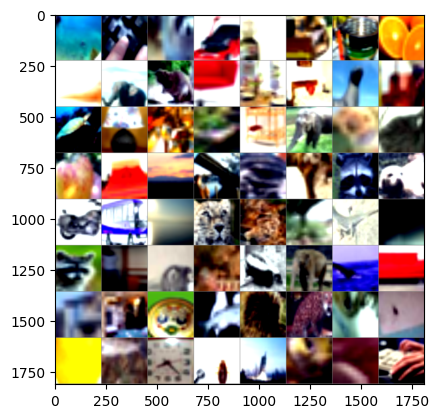

sea  keyboard  raccoon  lawn_mower  bottle  tractor  can  orange  dinosaur  elephant  beaver  chair  table  bed  otter  tractor  turtle  lamp  lobster  snake  bed  elephant  girl  possum  apple  bed  cloud  bridge  raccoon  camel  raccoon  seal  motorcycle  bus  sea  leopard  leopard  palm_tree  lizard  shark  raccoon  wardrobe  possum  lizard  skunk  elephant  whale  couch  house  bed  bowl  trout  porcupine  leopard  lobster  cockroach  apple  trout  clock  cockroach  rocket  mouse  couch  keyboard


In [14]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    # убрать нормализацию
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# взять случайный батч изображений
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('  '.join('{}'.format(label_names[labels[i]]) for i in range(batch_size)))

In [15]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [16]:
def train_model(net, criterion, optimizer, trainloader, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            if data[0].shape[1] != 3:
              continue
            inputs, labels = data
            
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 200 == 199:
                print('Epoch {0}/{1}, iteration {2}, loss: {3:.3f}'.format(epoch + 1, num_epochs, i + 1, 
                                                                          running_loss / 200))
                running_loss = 0.0
        print()

    print('Finished Training')
    
    return net

In [17]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} test images: {} %'.format(
        total, 100 * correct / total))

In [18]:
def class_accuracy(net, testloader):
    class_correct = list(1. for i in range(100))
    class_total = list(1. for i in range(100))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(100):
        print('Accuracy of {} : {} %'.format(label_names[i], 100 * class_correct[i] / class_total[i]))

In [19]:
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(3 * 224 * 224, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 100)
        
    def forward(self, x):
        x = x.view(-1, 3 * 224 * 224)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)      
        return x
    

net = FeedForwardNet()

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, train_dataloader, num_epochs=epochs)

Epoch 1/10, iteration 200, loss: 4.579
Epoch 1/10, iteration 400, loss: 4.461
Epoch 1/10, iteration 600, loss: 4.362

Epoch 2/10, iteration 200, loss: 4.251
Epoch 2/10, iteration 400, loss: 4.186
Epoch 2/10, iteration 600, loss: 4.178

Epoch 3/10, iteration 200, loss: 4.114
Epoch 3/10, iteration 400, loss: 4.080
Epoch 3/10, iteration 600, loss: 4.058

Epoch 4/10, iteration 200, loss: 4.007
Epoch 4/10, iteration 400, loss: 4.023
Epoch 4/10, iteration 600, loss: 3.989

Epoch 5/10, iteration 200, loss: 3.950
Epoch 5/10, iteration 400, loss: 3.946
Epoch 5/10, iteration 600, loss: 3.939

Epoch 6/10, iteration 200, loss: 3.909
Epoch 6/10, iteration 400, loss: 3.896
Epoch 6/10, iteration 600, loss: 3.887

Epoch 7/10, iteration 200, loss: 3.866
Epoch 7/10, iteration 400, loss: 3.871
Epoch 7/10, iteration 600, loss: 3.864

Epoch 8/10, iteration 200, loss: 3.822
Epoch 8/10, iteration 400, loss: 3.842
Epoch 8/10, iteration 600, loss: 3.828

Epoch 9/10, iteration 200, loss: 3.796
Epoch 9/10, itera

In [ ]:
all_accuracy(net, test_dataloader)

Accuracy of the network on the 10000 test images: 16.05 %


**Сверточная ниже**

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 100)
        self.fc2 = nn.Linear(100, 64)
        self.fc3 = nn.Linear(64, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, train_dataloader, num_epochs=3)

Epoch 1/3, iteration 200, loss: 3.831
Epoch 1/3, iteration 400, loss: 3.793
Epoch 1/3, iteration 600, loss: 3.767

Epoch 2/3, iteration 200, loss: 3.733
Epoch 2/3, iteration 400, loss: 3.728
Epoch 2/3, iteration 600, loss: 3.699

Epoch 3/3, iteration 200, loss: 3.678
Epoch 3/3, iteration 400, loss: 3.676
Epoch 3/3, iteration 600, loss: 3.647

Finished Training


In [23]:
# сохраним сеть
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [24]:
net_loaded = Net()
net_loaded.load_state_dict(torch.load(PATH))

<All keys matched successfully>

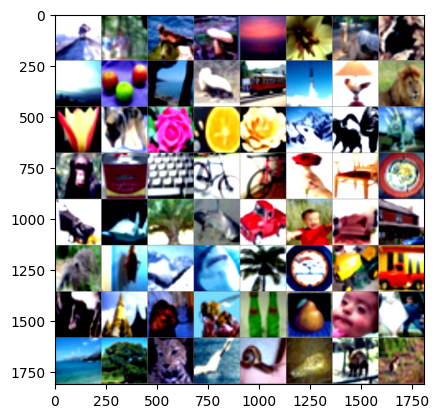

GroundTruth:  mountain forest seal mushroom sea tulip camel butterfly cloud apple sea skunk streetcar rocket lamp lion tulip wolf rose orange rose mountain skunk dinosaur chimpanzee can keyboard bicycle bicycle rose chair plate lawn_mower turtle palm_tree shark pickup_truck boy couch house porcupine cockroach mountain shark palm_tree clock lawn_mower pickup_truck skunk castle beaver bee bottle pear baby flatfish sea oak_tree leopard rocket snail crocodile camel rabbit


In [25]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('{}'.format(label_names[labels[j]]) for j in range(batch_size)))

In [26]:
outputs = net_loaded(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('{}'.format(label_names[predicted[j]]) for j in range(batch_size)))

Predicted:  wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf snail wolf wolf wolf wolf snail wolf wolf wolf snail motorcycle wolf wolf wolf wolf wolf snail wolf snail wolf wolf wolf aquarium_fish wolf motorcycle wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf wolf motorcycle wolf wolf wolf wolf wolf wolf wolf wolf


In [ ]:
all_accuracy(net, test_dataloader)

Accuracy of the network on the 10000 test images: 18.95 %


In [ ]:
class_accuracy(net, test_dataloader)

Accuracy of apple : 100.0 %
Accuracy of aquarium_fish : 25.0 %
Accuracy of baby : 14.285714285714286 %
Accuracy of bear : 25.0 %
Accuracy of beaver : 25.0 %
Accuracy of bed : 50.0 %
Accuracy of bee : 66.66666666666667 %
Accuracy of beetle : 20.0 %
Accuracy of bicycle : 14.285714285714286 %
Accuracy of bottle : 42.857142857142854 %
Accuracy of bowl : 20.0 %
Accuracy of boy : 16.666666666666668 %
Accuracy of bridge : 20.0 %
Accuracy of bus : 14.285714285714286 %
Accuracy of butterfly : 27.272727272727273 %
Accuracy of camel : 11.11111111111111 %
Accuracy of can : 12.5 %
Accuracy of castle : 71.42857142857143 %
Accuracy of caterpillar : 50.0 %
Accuracy of cattle : 12.5 %
Accuracy of chair : 22.22222222222222 %
Accuracy of chimpanzee : 25.0 %
Accuracy of clock : 16.666666666666668 %
Accuracy of cloud : 42.857142857142854 %
Accuracy of cockroach : 80.0 %
Accuracy of couch : 16.666666666666668 %
Accuracy of cra : 16.666666666666668 %
Accuracy of crocodile : 20.0 %
Accuracy of cup : 33.333333

real tensor([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75, 81, 69, 40, 43, 92, 97,
        70, 53, 70, 49, 75, 29, 21, 16, 39,  8,  8, 70, 20, 61, 41, 93, 56, 73,
        58, 11, 25, 37, 63, 24, 49, 73, 56, 22, 41, 58, 75, 17,  4,  6,  9, 57,
         2, 32, 71, 52, 42, 69, 77, 27, 15, 65])
pred tensor([97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 77, 97, 97, 97, 97, 77,
        97, 97, 97, 77, 48, 97, 97, 97, 97, 97, 77, 97, 77, 97, 97, 97,  1, 97,
        48, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97,
        97, 48, 97, 97, 97, 97, 97, 97, 97, 97])


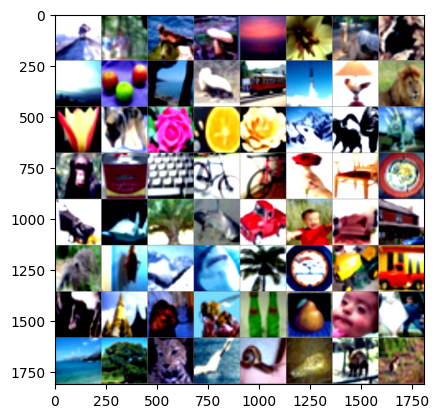

mountain  forest  seal  mushroom  sea  tulip  camel  butterfly  cloud  apple  sea  skunk  streetcar  rocket  lamp  lion  tulip  wolf  rose  orange  rose  mountain  skunk  dinosaur  chimpanzee  can  keyboard  bicycle  bicycle  rose  chair  plate  lawn_mower  turtle  palm_tree  shark  pickup_truck  boy  couch  house  porcupine  cockroach  mountain  shark  palm_tree  clock  lawn_mower  pickup_truck  skunk  castle  beaver  bee  bottle  pear  baby  flatfish  sea  oak_tree  leopard  rocket  snail  crocodile  camel  rabbit
wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  snail  wolf  wolf  wolf  wolf  snail  wolf  wolf  wolf  snail  motorcycle  wolf  wolf  wolf  wolf  wolf  snail  wolf  snail  wolf  wolf  wolf  aquarium_fish  wolf  motorcycle  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf  motorcycle  wolf  wolf  wolf  wolf  wolf  wolf  wolf  wolf


In [27]:
def imshow(img):
    # убрать нормализацию
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# взять случайный батч изображений
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

outputs = net(images) 
_, predicted = torch.max(outputs.data, 1)

print("real", labels)
print("pred", predicted)

imshow(torchvision.utils.make_grid(images))
print('  '.join('{}'.format(label_names[labels[j]]) for j in range(batch_size)))
print('  '.join('{}'.format(label_names[predicted[j]]) for j in range(batch_size)))

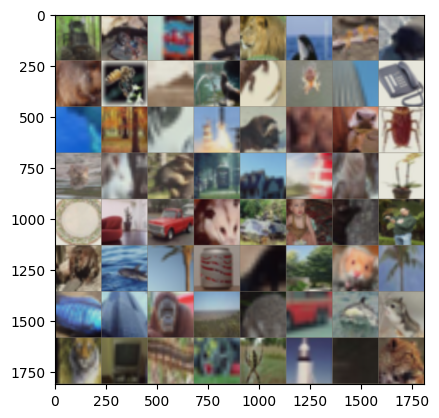

tractor  lobster  bottle  snake  lion  whale  lizard  turtle  beaver  bee  mountain  seal  crocodile  spider  skyscraper  telephone  whale  forest  lobster  rocket  cattle  shrew  cattle  cockroach  otter  rabbit  possum  streetcar  house  bottle  seal  orchid  plate  couch  pickup_truck  possum  tank  baby  bear  man  beaver  dolphin  palm_tree  can  skunk  maple_tree  hamster  palm_tree  aquarium_fish  skyscraper  chimpanzee  plain  porcupine  bus  dolphin  hamster  tiger  television  caterpillar  lawn_mower  spider  rocket  spider  leopard


In [28]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

images, labels = next(iter(train_dataloader))

out = torchvision.utils.make_grid(images)

imshow(out)
print('  '.join('{}'.format(label_names[labels[i]]) for i in range(batch_size)))

In [29]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [30]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [31]:
model_ft = models.resnet18(pretrained=True)

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 100)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 250MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=4)

Epoch 0/3
----------
train Loss: 3.3121 Acc: 0.2460
val Loss: 1.8284 Acc: 0.5349

Epoch 1/3
----------
train Loss: 2.1026 Acc: 0.4673
val Loss: 1.2570 Acc: 0.6499

Epoch 2/3
----------
train Loss: 1.8149 Acc: 0.5330
val Loss: 1.1824 Acc: 0.6705

Epoch 3/3
----------
train Loss: 1.7636 Acc: 0.5439
val Loss: 1.1533 Acc: 0.6751

Training complete in 18m 25s
Best val Acc: 0.675100


Epoch 0/3
----------
train Loss: 3.3121 Acc: 0.2460
val Loss: 1.8284 Acc: 0.5349

Epoch 1/3
----------
train Loss: 2.1026 Acc: 0.4673
val Loss: 1.2570 Acc: 0.6499

Epoch 2/3
----------
train Loss: 1.8149 Acc: 0.5330
val Loss: 1.1824 Acc: 0.6705

Epoch 3/3
----------
train Loss: 1.7636 Acc: 0.5439
val Loss: 1.1533 Acc: 0.6751

Training complete in 18m 25s
Best val Acc: 0.675100

In [32]:
##### model_conv = torchvision.models.resnet152(pretrained=True)
for param in model_ft.parameters():
    # градиенты теперь не будут здесь протекать
    param.requires_grad = False

num_ftrs = model_ft.fc.in_features
# по умолчанию requires_grad = True
model_ft.fc = nn.Linear(num_ftrs, 100)

model_conv = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=2, gamma=0.1)

In [33]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=4)

Epoch 0/3
----------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 4.7900 Acc: 0.0083
val Loss: 4.8150 Acc: 0.0079

Epoch 1/3
----------
train Loss: 4.7903 Acc: 0.0091
val Loss: 4.8092 Acc: 0.0083

Epoch 2/3
----------
train Loss: 4.7912 Acc: 0.0084
val Loss: 4.8137 Acc: 0.0085

Epoch 3/3
----------
train Loss: 4.7936 Acc: 0.0077
val Loss: 4.8137 Acc: 0.0081

Training complete in 13m 38s
Best val Acc: 0.008500


In [34]:
model_ft = models.resnet152(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 100)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:05<00:00, 45.3MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=4)

Epoch 0/3
----------
train Loss: 2.8337 Acc: 0.3555
val Loss: 1.0557 Acc: 0.7011

Epoch 1/3
----------
train Loss: 1.4944 Acc: 0.6025
val Loss: 0.7213 Acc: 0.7816

Epoch 2/3
----------


In [ ]:
for param in model_ft.parameters():
    # градиенты теперь не будут здесь протекать
    param.requires_grad = False

num_ftrs = model_ft.fc.in_features
# по умолчанию requires_grad = True
model_ft.fc = nn.Linear(num_ftrs, 100)

model_conv = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_ft.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=2, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=4)

Epoch 0/4
----------


KeyboardInterrupt: 

В результате лучшая точность на resnet158 = 0.675100